# 05. 회귀
- 분류의 예측값은 카테고리와 같은 이산형 클래스, 회귀는 연속형 숫자 값
- 선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)을 최소화하는 직선형 회귀선을 최적화
 - 일반 선형 회귀
 - 릿지(Ridge)
 - 라쏘(Lasso)
 - 엘라스틱넷(ElasticNet)
 - 로지스틱 회귀(분류에 사용되는 선형 모델)

## 1. 단순 선형 회귀
- 독립변수 하나, 종속변수 하나
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀는 잔차 값의 합이 최소가 되는 모델
- RSS : 오류 값의 제곱을 구해서 더하는 방식
- 회귀에서 RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용함수라고 함.

## 2. 비용 최소화하기 - 경사 하강법(Gradient Descent)
- 점진적으로 반복적인 계산을 통해 W파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식

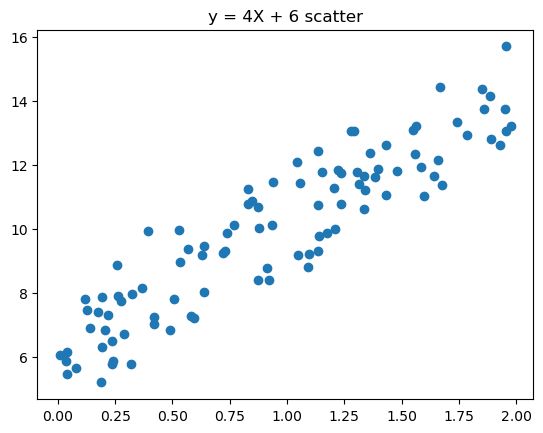

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y= 4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1) # 뒤에 더한 배열이 노이즈

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)
plt.title('y = 4X + 6 scatter')
plt.show()

- w1을 4에 가까운 값으로, w0을 6에 가까운 값으로 도출
- 먼저 w1과 w0을 0으로 초기화한 뒤 특정 횟수만큼 반복하면서 w1과 w0을 업데이트
- 업데이트 된 w1과 w0을 비용함수에 적용해 최솟값을 구하는 과정

In [2]:
# w1과 w0를 업데이트 할 w1_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0 # T 메소드 : 행렬 전치, dot함수 : 행렬곱
    diff = y-y_pred # 실제 값과 예측 값의 차이 -> 잔차
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1)) # 1이 1개씩있는 리스트 100개
    
    # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [3]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1,w0

In [4]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=10000)
print('w1:{0:.3f}, w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:3.968, w0:6.222
Gradient Descent Total Cost : 0.9924


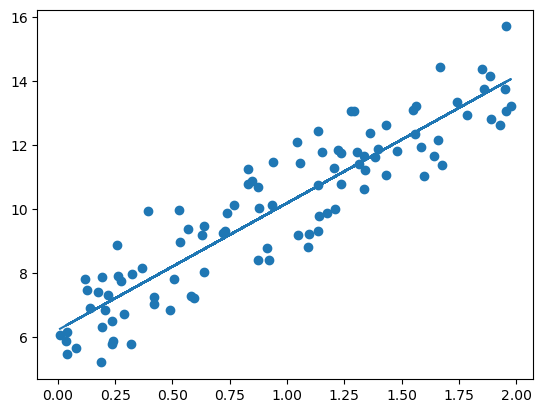

In [5]:
plt.scatter(X,y)
plt.plot(X, y_pred)

- 일반 경사 하강법은 시간이 오래걸림
- 그래서 실전에서는 대부분 확률적 경사 하강법을 이용
- 확률적 경사 하강법 : 일부 데이터만 이용해 w가 업데이트 되는 값을 계산함

In [6]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 1000000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X와 sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [7]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1 : {0:.3f}, w0 : {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('확률적 경사 하강법 비용 : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.028, w0 : 6.156
확률적 경사 하강법 비용 : 0.9937


## 다항 회귀와 과(대)적합/과소적합 이해
- Polynomial
- 선형회귀 O, 비선형회귀 X

In [8]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]dml 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeautres를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 :\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 :
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [9]:
def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 값 :\n',X)
y = polynomial_func(X)
print('삼차 다항식 결정 값 :\n', y)

일차 단항식 계수 값 :
 [[0 1]
 [2 3]]
삼차 다항식 결정 값 :
 [[ 1  5]
 [17 43]]


In [10]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 피처 :\n', poly_ftr)

# 선형 회귀에 3차 다항식 계수 피처와 3차 다항식 결정 값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)

print('Polynomial 회귀 계수 :\n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape :\n', model.coef_.shape)

3차 다항식 계수 피처 :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 :
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape :
 (2, 10)


In [11]:
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

# Pipeline 객체로 단소하게 다항식 피처 변환과 선형 회귀를 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수 :\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 :
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


### 다항 회귀를 이용한 과소적합 및 과적합 이해
- 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 테스트 데이터에 대한 예측 정확도가 떨어짐 -> 과적합

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

- 다항식 차수를 1, 4, 15로 변경하면서 예측 결과 비교


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


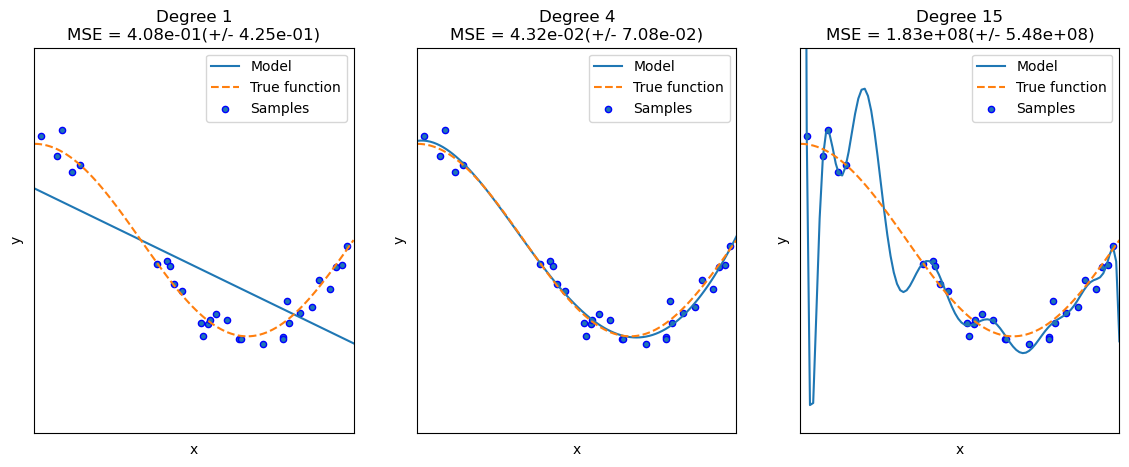

In [13]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

### 편향-분산 트레이드오프(Bias - Variance Trade off)
- degree1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우쳐 있음
- degree15는 학습 데이터 하나 하나의 특성을 반영하면서 매우 높은 변동성을 가지고 있음 -> 고분산성 모델
- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음
- 전체 오류가 가장 낮아지는 지점 : '골디락스' 지점

## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

- 앞에서 보았듯이 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루어야 함.
- 기존 비용함수에 알파계수와 W값의 균형을 맞출 수 있는 변수를 더함 -> 규제
- 릿지(L2) : W의 제곱에 대해 패널티를 부여하는 방식(위에서 언급한 방식과 동일)
- 라쏘(L1) : W의 절댓값에 대해 패널티를 부여하는 방식

### 릿지

In [14]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

C:\Users\dlrud\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [16]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0,0.1,1,10,100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))    

 5 folds 의 평균 RMSE : 5.829 
 5 folds 의 평균 RMSE : 5.788 
 5 folds 의 평균 RMSE : 5.653 
 5 folds 의 평균 RMSE : 5.518 
 5 folds 의 평균 RMSE : 5.330 


- 시각화

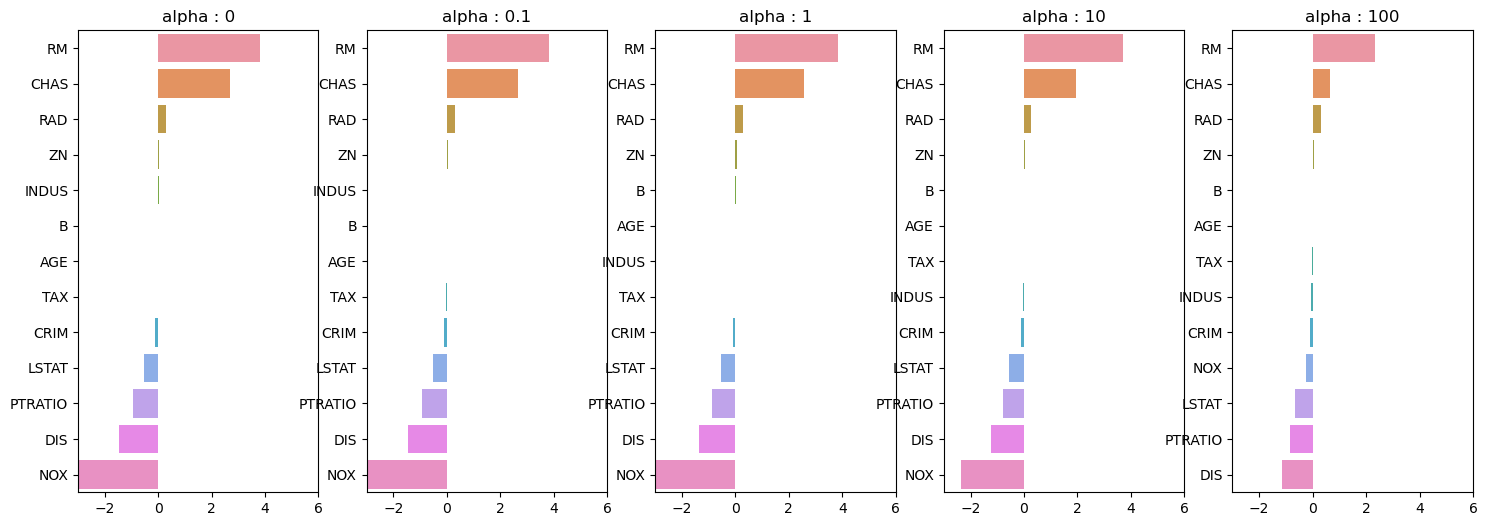

In [17]:
import seaborn as sns
# 각 alpha 에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coef_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coef = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha : ' + str(alpha)
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 변환
    coef_df[colname] = coef
    coef = coef.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coef.values, y=coef.index, ax=axs[pos])
    
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

- alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐

In [18]:
# alpha 값의 변화에 따른 릿지 회귀 계수 값
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha : '+str(ridge_alphas[0])
coef_df.sort_values(by=sort_column, ascending=False)

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


- 릿지 회귀의 경우에는 회귀 계수를 0으로 만들지 않음

### 라쏘
- W의 절댓값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘(Lasso) 회귀.
- 릿지와 달리 불필요한 회귀 계수를 0으로 만들고 제거함

In [31]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델이 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coef_df = pd.DataFrame()
    if verbose :
        print('###### ', model_name, '######')
        for param in params:
            if model_name == 'Ridge':
                model = Ridge(alpha=param)
            elif model_name == 'Lasso':
                model = Lasso(alpha=param)
            elif model_name == 'ElasticNet':
                model = ElasticNet(alpha=param, l1_ratio=0.7)
            neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
            avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
            print('alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
            # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
            model.fit(X_data, y_target)
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
            coef = pd.Series(data=model.coef_, index=X_data.columns)
            colname='alpha : '+str(param)
            coef_df[colname] = coef
        return coef_df
# end of get_linear_reg_eval

In [32]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coef_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######  Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.189


In [33]:
# 반환된 coef_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha : '+str(lasso_alphas[0])
coef_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 엘스틱넷 회귀
- L2 규제와 L1 규제를 결합한 회귀
- 오래 걸림
- 릿지와 라쏘의 alpha 값과는 다름 -> a * L1 + b * L2(a와 b는 각각 L1규제의 알파값, L2규제의 알파값)
- l1_ratio 파라미터 = a / (a+b) -> l1_ratio 값이 0이면 a가 0이므로 L2규제와 동일 1이면 b가 0이므로 L1규제와 동일

In [34]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coef_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n = X_data, y_target_n = y_target)


######  ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.068


In [35]:
# 반환된 coef_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrmae 출력
sort_column = 'alpha : '+ str(elastic_alphas[0])
coef_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 선형 회귀 모델을 위한 데이터 변환
- 데이터에 대한 스케일링/정규화 작업 수행이 일반적.
- 중요 피처들이나 타깃의 분포도가 심하게 왜곡됐을 경우에 수행
- 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환(StandardScaler)
- 혹은, 최솟값이 0이고 최댓값이 1인 값으로 정규화(MinManScaler)
- 원래 값에 log를 씌우면 보다 정규 분포에 가까운 형태로 값이 분포(로그 변환) -> 가장 많이 쓰임

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [43]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [44]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴

## 로지스틱 회귀
- 로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘입니다. 즉, 로지스틱 회귀는 분류에 사용

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [53]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [55]:
from sklearn.model_selection import GridSearchCV

params={'penalty' : ['l2', 'l1'], 'C' : [0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 0.975


C:\Users\dlrud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dlrud\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlrud\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dlrud\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_mo

## 회귀 트리
- 트리 기반으로 하는 회귀 방식
- 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 트리 생성이 CART 알고리즘에 기반하고 있기 때문에 분류 뿐만 아니라 회귀도 가능(결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM)

In [57]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostondf = pd.DataFrame(boston.data, columns=boston.feature_names)

bostondf['PRICE'] = boston.target
y_target = bostondf['PRICE']
X_data = bostondf.drop('PRICE', axis=1)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

C:\Users\dlrud\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

5 교차 검증의 개별 Negative MSE scores : [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [58]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE : 5.978
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE : 4.423
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE : 4.269


C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\dlrud\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

#### XGBRegressor ####
5 교차 검증의 평균 RMSE : 4.251
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE : 4.646


<AxesSubplot:>

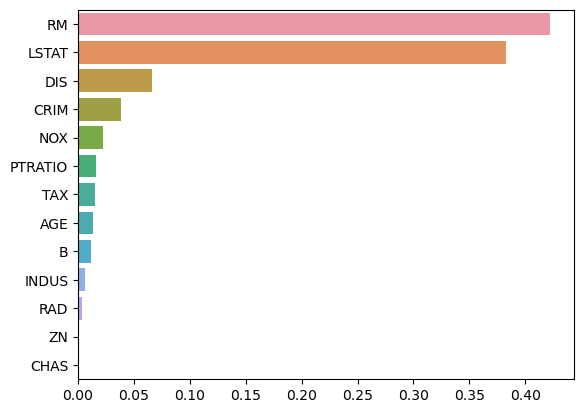

In [62]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target, 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


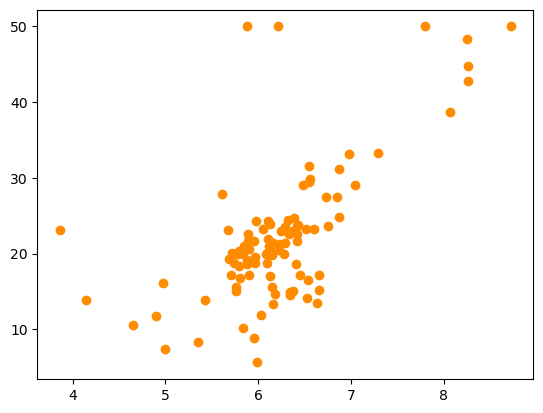

In [64]:
bostondf_sample = bostondf[['RM', 'PRICE']]
bostondf_sample = bostondf_sample.sample(n=100, random_state=0)
print(bostondf_sample.shape)
plt.figure()
plt.scatter(bostondf_sample.RM, bostondf_sample.PRICE, c='darkorange')

In [67]:
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성 트리의 깊이는 각각 2,7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5 ~ 8.5 까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostondf_sample['RM'].values.reshape(-1,1)
y_target = bostondf_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

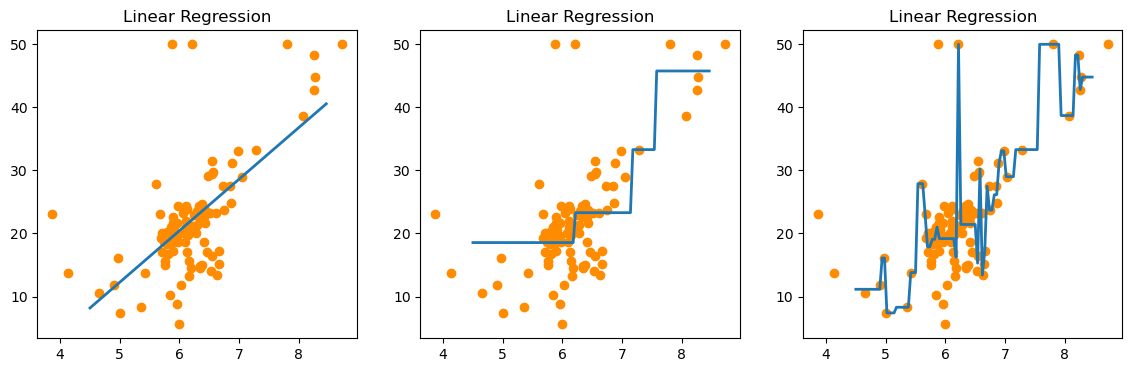

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축 값을 4.5 ~ 8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostondf_sample.RM, bostondf_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Linear Regression')
ax2.scatter(bostondf_sample.RM, bostondf_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

ax3.set_title('Linear Regression')
ax3.scatter(bostondf_sample.RM, bostondf_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)